# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [483]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './Part01/'

In [484]:
data = {'Q1':[1,3,4,4,4],'Q2':[2,3,2,2,3],'Q3':[1,5,2,4,4]}

frame = pd.DataFrame(data)

result = frame.apply(pd.value_counts).fillna(0)

In [485]:
frame

,Q1,Q2,Q3
0,1,2,1
1,3,3,5
2,4,2,2
3,4,2,4
4,4,3,4


In [486]:
result

,Q1,Q2,Q3
1,1.0,0.0,1.0
2,0.0,3.0,1.0
3,1.0,2.0,0.0
4,3.0,0.0,2.0
5,0.0,0.0,1.0


In [487]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
df = pd.read_csv(f_app_train)

In [488]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [489]:
df.shape

(307511, 122)

In [490]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [491]:
# 資料前處理，這邊目前有點卡住，詢問專家中 (0907)
# pd.isna(df)
# df[pd.isna(df)]

# 前處理，這次直接drop
df = df.dropna()

In [492]:
dtype_df = df.dtypes.reset_index() # 不reset_index好像不會變成DataFrame
dtype_df.head()

,index,0
0,SK_ID_CURR,int64
1,TARGET,int64
2,NAME_CONTRACT_TYPE,object
3,CODE_GENDER,object
4,FLAG_OWN_CAR,object


In [493]:
dtype_df.columns = ["Count", "Column Type"]
dtype_df.head()

,Count,Column Type
0,SK_ID_CURR,int64
1,TARGET,int64
2,NAME_CONTRACT_TYPE,object
3,CODE_GENDER,object
4,FLAG_OWN_CAR,object


In [494]:
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


In [495]:
# 參考HW07的特徵工程
int_features = []
float_features = []
object_features = []

for dtype, feature in zip(df.dtypes, df.columns): # 滿厲害的招
#     print(dtype, feature)
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

41 Integer Features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

65 Float Features : ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OW

In [496]:
#這樣就可以單獨秀出特定類型的欄位集合, 方便做後續的特徵工程處理
df[float_features].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,103500.0,573628.5,24435.0,463500.0,0.009657,-341.0,22.0,2.0,0.270766,0.707126,...,1.0,2.0,1.0,-2053.0,0.0,0.0,0.0,0.0,0.0,3.0
124,202500.0,260725.5,16789.5,198000.0,0.018850,-762.0,8.0,2.0,0.647045,0.746486,...,0.0,6.0,0.0,-1782.0,0.0,0.0,0.0,0.0,0.0,3.0
152,202500.0,675000.0,53329.5,675000.0,0.031329,-180.0,4.0,2.0,0.674832,0.616156,...,0.0,0.0,0.0,-1792.0,0.0,0.0,0.0,1.0,0.0,4.0
161,162000.0,263686.5,24781.5,238500.0,0.022625,-464.0,3.0,2.0,0.534999,0.585859,...,0.0,5.0,0.0,-1161.0,0.0,0.0,0.0,0.0,0.0,3.0
255,225000.0,1019205.0,31032.0,774000.0,0.072508,-335.0,9.0,2.0,0.262005,0.302394,...,0.0,3.0,0.0,-14.0,0.0,0.0,0.0,6.0,0.0,1.0


In [497]:
df[float_features].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-4276.979191,11.224134,2.401418,0.495989,0.552833,...,0.127296,1.352360,0.087654,-1108.502209,0.005813,0.005929,0.039061,0.368984,0.258080,1.757615
std,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3081.907414,12.403600,0.934732,0.204975,0.172350,...,0.405119,2.205177,0.324181,866.217053,0.077537,0.095655,0.208770,1.049016,0.596765,1.756799
min,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-17176.000000,0.000000,1.000000,0.017756,0.000405,...,0.000000,0.000000,0.000000,-4131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-6515.000000,4.000000,2.000000,0.333352,0.464976,...,0.000000,0.000000,0.000000,-1736.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-4001.000000,8.000000,2.000000,0.498438,0.596305,...,0.000000,0.000000,0.000000,-967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-1467.250000,14.000000,3.000000,0.660547,0.682057,...,0.000000,2.000000,0.000000,-389.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,0.000000,65.000000,7.000000,0.941619,0.855000,...,4.000000,27.000000,3.000000,0.000000,2.000000,4.000000,4.000000,16.000000,8.000000,17.000000


In [498]:
df[int_features].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
71,100083,0,0,-15406,-892,-4176,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
124,100145,0,1,-16282,-4375,-1494,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
152,100179,0,0,-11375,-2311,-2009,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
161,100190,0,0,-13972,-4472,-4529,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
255,100295,1,1,-11356,-602,-3224,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [499]:
df[int_features].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.0,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,-14189.009416,-2299.091374,-2975.926296,1.0,0.999767,0.211114,0.996861,...,0.000116,0.014764,0.004999,0.004301,0.010346,0.000233,0.009998,0.000581,0.001046,0.000233
std,103218.951947,0.239617,0.775007,3259.202657,2077.178768,1515.852205,0.0,0.015247,0.408123,0.055940,...,0.010782,0.120614,0.070530,0.065447,0.101196,0.015247,0.099493,0.024104,0.032331,0.015247
min,100083.000000,0.000000,0.000000,-24835.000000,-14375.000000,-6551.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188965.750000,0.000000,0.000000,-16299.750000,-3132.500000,-4283.000000,1.0,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278239.000000,0.000000,0.000000,-13883.500000,-1680.500000,-3197.000000,1.0,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,370083.500000,0.000000,1.000000,-11664.500000,-817.000000,-1683.000000,1.0,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456226.000000,1.000000,5.000000,-7715.000000,-4.000000,-1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [500]:
df[object_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
71,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
124,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,Laborers,TUESDAY,Self-employed,reg oper spec account,block of flats,Panel,No
152,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Managers,MONDAY,Trade: type 7,reg oper account,block of flats,Monolithic,No
161,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Government,reg oper account,block of flats,Panel,No
255,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No


In [501]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,8602.000000,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416,-2299.091374,...,0.009998,0.000581,0.001046,0.000233,0.005813,0.005929,0.039061,0.368984,0.258080,1.757615
std,103218.951947,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657,2077.178768,...,0.099493,0.024104,0.032331,0.015247,0.077537,0.095655,0.208770,1.049016,0.596765,1.756799
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,-14375.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188965.750000,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000,-3132.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278239.000000,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000,-1680.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,370083.500000,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000,-817.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000,-4.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,17.000000


In [502]:
# 來練習畫直方圖，以TARGET為例

# tar = df.groupby('TARGET')
# tar.groups
# tar_1 = tar.get_group(1)
# tar_0 = tar.get_group(0)
# df[tar]
# tar.size()
# .aggregate('count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A465BBD128>]],
      dtype=object)

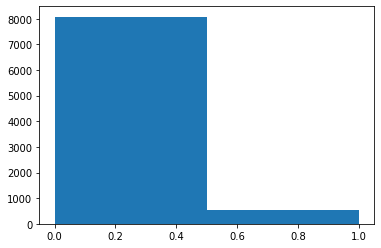

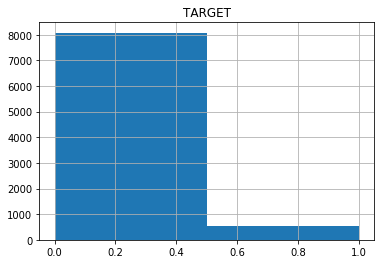

In [508]:
# 法一
data = df['TARGET']
data.hist(bins=2, grid=False)

# 法二
df.hist(bins=2, grid=True, column='TARGET')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A465D5B4E0>,
      dtype=object)

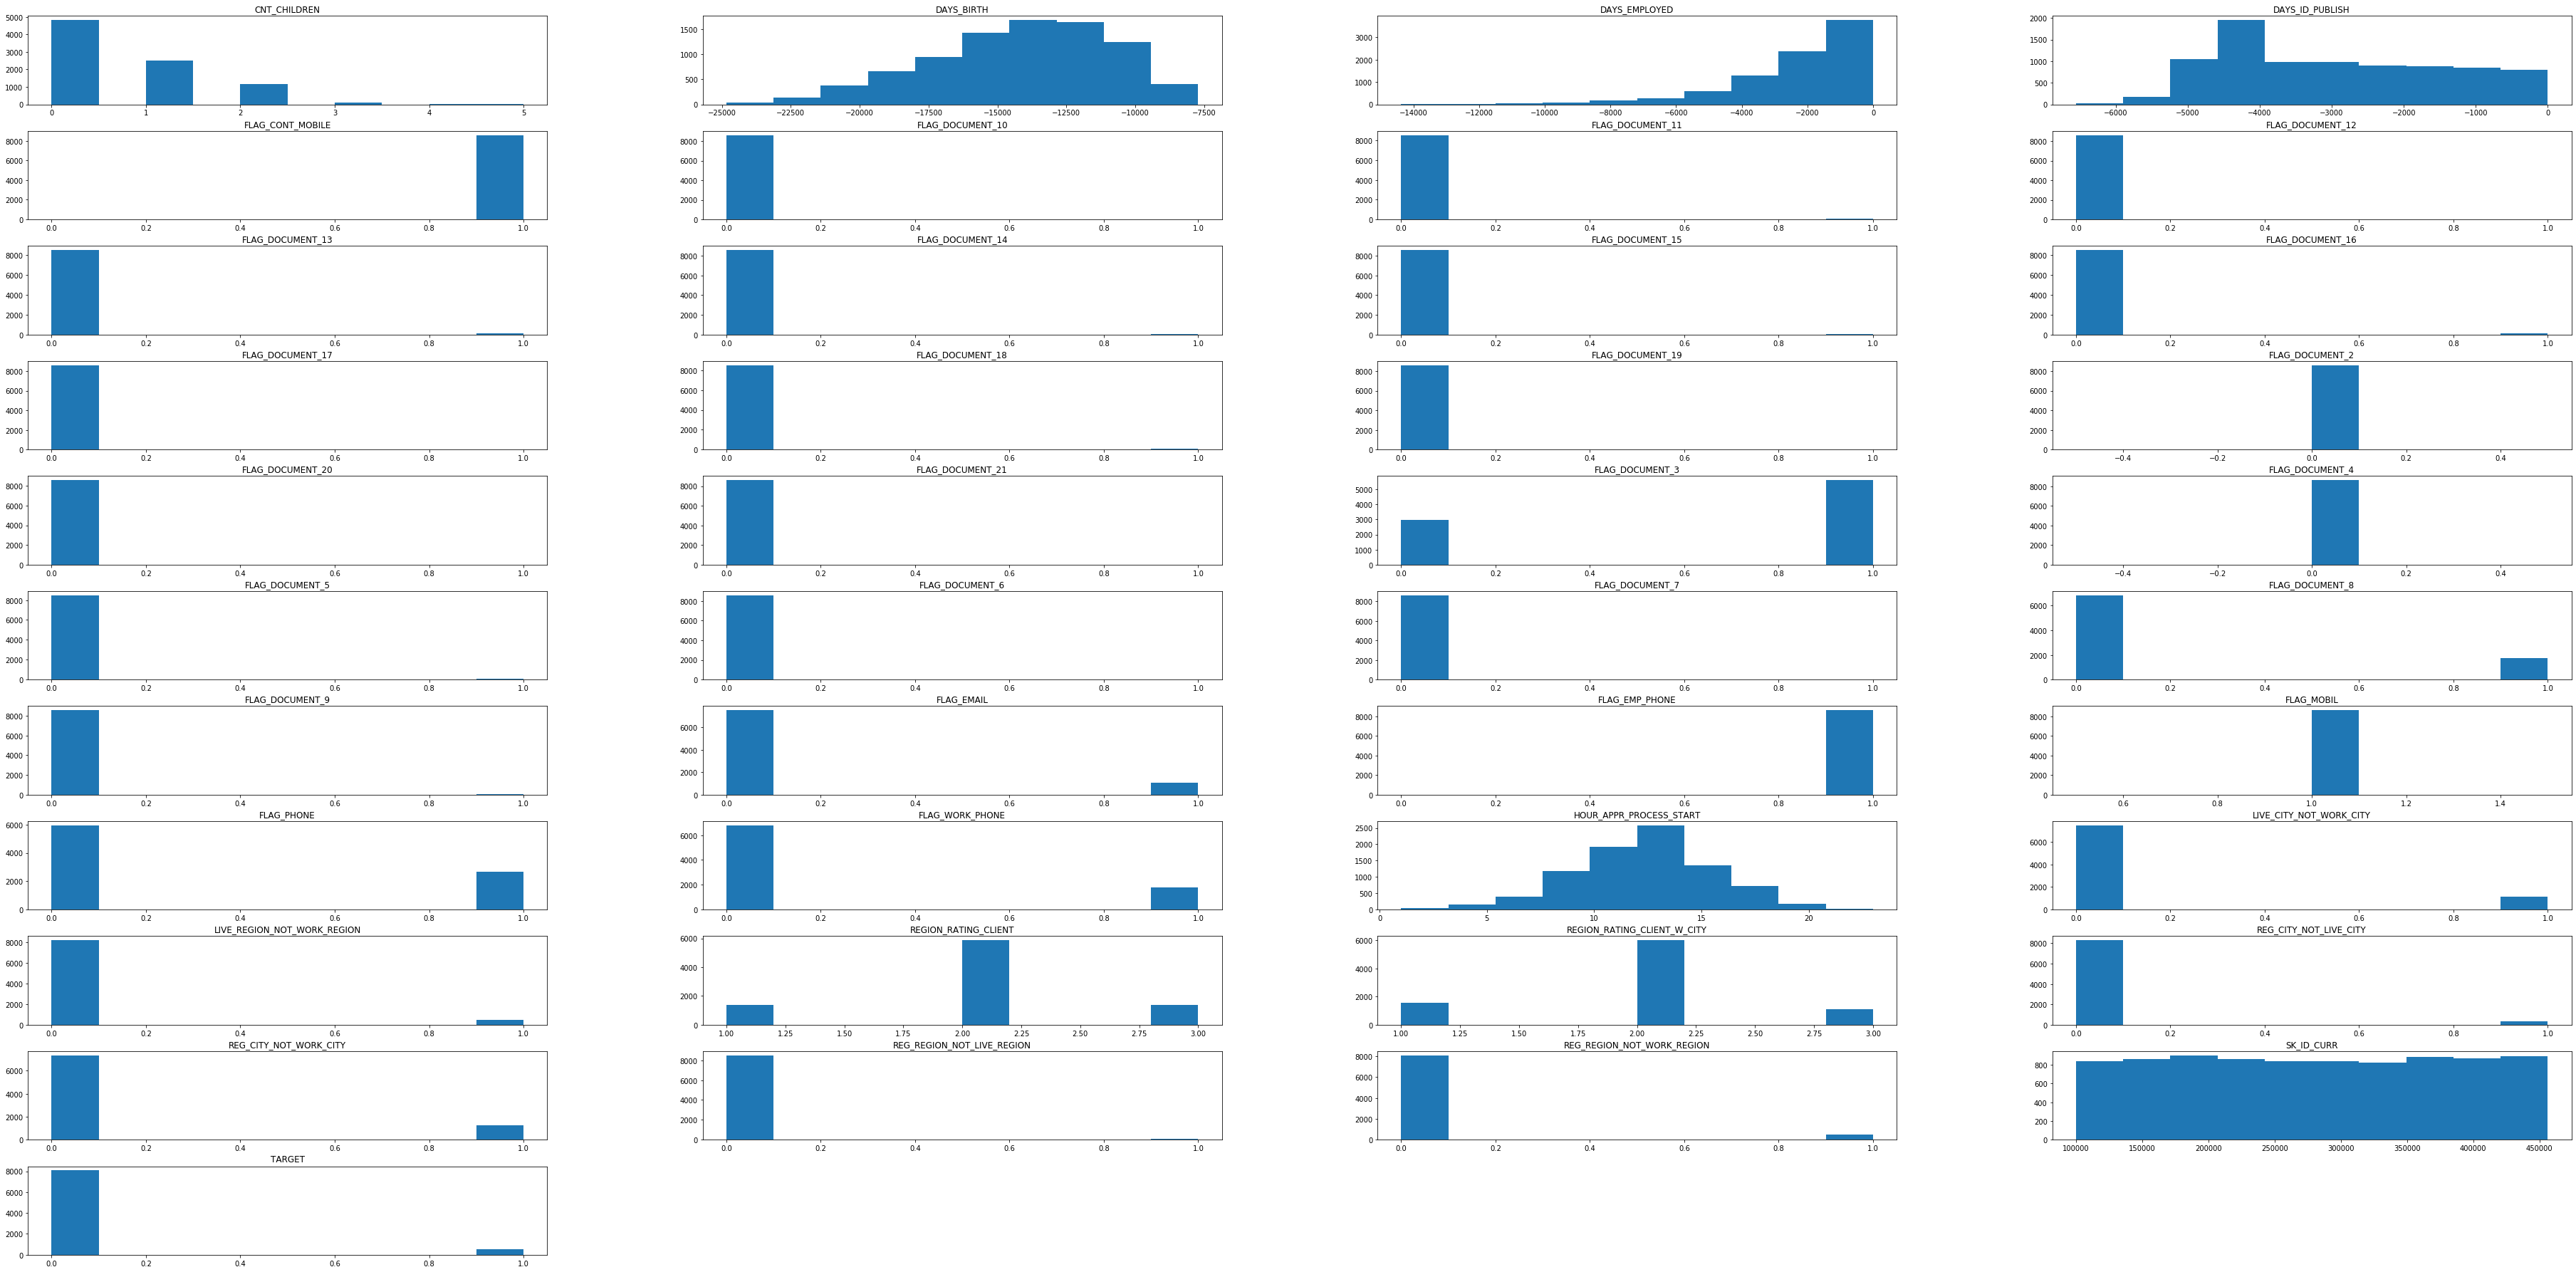

In [509]:
df[int_features].hist(layout=(11, 4), figsize=(64,32), grid=False)